In [7]:
import json
import pandas as pd
import os
import numpy as np
from progressbar import progressbar as pb
import re
from matplotlib import pyplot as plt
import pickle

path = '/Users/user/Python/Diploma/filtered_data/'
filenames = os.listdir(path)

domains = {'История': [], 'Экономика': [], 'Биология': [], 'Медицина': [], 'Информатика': [], 'Педагогика': []}

for file in filenames:
    for dom in domains.keys():
        if dom.lower()[:5] in file[:10]:
            domains[dom].append(file)

domains

{'История': ['история.история_народов_африки.txt',
  'история.история_народов_северной_и_южной_америки.txt',
  'история.история_древнего_мира.txt',
  'история.историческая_терминология.txt',
  'история.история_россии.txt',
  'история.история_народов_европы.txt',
  'история.исторические_личности.txt',
  'история.всемирная_история.txt',
  'история.история_народов_западной_восточной_и_южной_африки.txt'],
 'Экономика': ['экономика.экономическая_теория.txt',
  'экономика.экономическая_история.txt',
  'экономика.экономическая_теория_2.txt'],
 'Биология': ['биология.высшие_растения.txt',
  'биология.цитология_и_генетика.txt',
  'биология.анатомия_физиология_гигиена_человека.txt',
  'биология.беспозвоночные_животные.txt',
  'биология.низшие_растения.txt',
  'биология.позвоночные_животные.txt',
  'биология.эволюция_и_экология.txt'],
 'Медицина': ['медицина.психология.txt',
  'медицина.педиатрия.txt',
  'медицина.лечебное_дело.txt',
  'медицина.терапия_1.txt'],
 'Информатика': ['информатика

In [8]:
def parse_file(text):
    strs = json.loads(text)
    
    ready = []
    
    for i in range(len(strs)):
        new_ready = []
        
        question = strs[i]['question']
        new_ready.append(question)
        
        options = strs[i]['options']
        options = np.array(options).T
        answers = list(options[0])
        labels = list(options[1])
        
        sz = min(len(answers), len(labels))
        
        answers, labels = answers[:sz], labels[:sz]
        chosen_answers, chosen_labels = [], []
        
        if len(answers) < 4 or labels.count('False') < 3:
            continue
        
            
        for j in range(len(labels)):
            if labels[j] == 'True':
                if chosen_labels.count('True') == 0:
                    chosen_answers.append(answers[j])
                    chosen_labels.append(labels[j])
                    
                
            elif chosen_labels.count('False') < 3:
                chosen_answers.append(answers[j])
                chosen_labels.append(labels[j])
            
            if chosen_labels.count('False') == 3:
                if chosen_labels.count('True') == 1:
                    break
                else:
                    continue
        
        for answ in chosen_answers:
            new_ready.append(answ)
            
        if chosen_labels.count('True') == 0:
            continue
            
        new_ready.append(chosen_labels.index('True') + 1)
            
        '''print(question)
        print(answers)
        print(labels)
        print(chosen_answers)
        print(chosen_labels)
        
        '''
        ready.append(new_ready)
        
    return ready


In [9]:
samples = {'История': [], 'Экономика': [], 'Биология': [], 'Медицина': [], 'Информатика': [], 'Педагогика': []}

for key, value in domains.items():
    for file in value:
        with open(path + file) as f:
            text = f.read()
        samples[key].extend(parse_file(text))

In [10]:
tables = {'История': None, 'Экономика': None, 'Биология': None, 'Медицина': None, 'Информатика': None, 'Педагогика': None}

In [11]:
for key, value in samples.items():
    tables[key] = pd.DataFrame(value)
    tables[key] = tables[key].dropna()
    tables[key][5] = tables[key][5].astype(int)
    tables[key] = tables[key].drop_duplicates()
    tables[key] = tables[key].reset_index(drop=True)
    tables[key].columns = ['0', '1', '2', '3', '4', '5']

In [12]:
import string

for key, value in tables.items():
    for i in pb(range(len(value))):
        for j in range(5):
            value.iloc[i,j] = re.sub('[А-Я]\.[А-Я]\.', '', value.iloc[i,j])
            value.iloc[i,j] = re.sub('[А-Я]\.', '', value.iloc[i,j])
            value.iloc[i,j] = value.iloc[i,j].strip()
        
    value = value.drop_duplicates()
    value = value.reset_index(drop=True)

100% (953 of 953) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (767 of 767) |######################| Elapsed Time: 0:00:05 Time:  0:00:05
100% (2492 of 2492) |####################| Elapsed Time: 0:00:17 Time:  0:00:17
100% (5522 of 5522) |####################| Elapsed Time: 0:00:51 Time:  0:00:51
100% (27 of 27) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (164 of 164) |######################| Elapsed Time: 0:00:01 Time:  0:00:01


In [13]:
for key, value in tables.items():
    to_delete = []

    for i in pb(range(len(tables[key]))):
        for j in range(1,5):
            if len(re.findall('[А-Яа-яЁё]+', tables[key].iloc[i,j])) == 0 or \
            len(re.findall("[а-яА-Я]\, [а-яА-Я]\;", tables[key].iloc[i,j])) > 0 or \
            len(re.findall("[а-яА-Я]\, [а-яА-Я]\, [а-яА-Я]", tables[key].iloc[i,j])) > 0 or \
            len(re.findall("[0-9]", tables[key].iloc[i,j])) > 0 or \
            len(re.findall("[A-Z]\, [A-Z]", tables[key].iloc[i,j])) > 0:
                to_delete.append(i)
                break

    tables[key] = tables[key].drop(to_delete)
    tables[key] = tables[key].reset_index(drop=True)

100% (953 of 953) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (767 of 767) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (2492 of 2492) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5522 of 5522) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (27 of 27) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (164 of 164) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


In [14]:
for key, _ in tables.items():
    for i in pb(range(len(tables[key]))):
        for j in range(5):
            tables[key].iloc[i,j] = tables[key].iloc[i,j].translate(str.maketrans('', '', string.punctuation))

100% (819 of 819) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (722 of 722) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (2184 of 2184) |####################| Elapsed Time: 0:00:05 Time:  0:00:05
100% (4013 of 4013) |####################| Elapsed Time: 0:00:11 Time:  0:00:11
100% (23 of 23) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (163 of 163) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


In [15]:
all_df = pd.read_csv('big_data_fix.csv')

In [16]:
found = {'История': None, 'Экономика': None, 'Биология': None, 'Медицина': None, 'Информатика': None, 'Педагогика': None}

for key, value in tables.items():
    found[key] = pd.merge(tables[key], all_df.reset_index(), on = list(all_df.columns))

In [17]:
found['Медицина']

,0,1,2,3,4,5,index
0,﻿ к экзогенноорганическим психическим заболева...,Психические расстройства при сердечнососудисты...,Психические расстройства при сосудистых заболе...,Психические расстройства при желудочнокишечных...,Психические расстройства при инфекционных забо...,2,5593
1,в течении травматической болезни выделяют след...,Начальный поздний,Начальный острый отдаленных последствий,Начальный подострый поздний,Начальный острый поздний отдаленных последствий,4,5594
2,сквозными психическими расстройствами при чере...,Общемозговые,Сумеречные,Астенические,Делириозные,3,5595
3,для начального периода черепномозговой травмы ...,Органического поражения головного мозга,Общемозговые,Галлюцинаторнобредовые,Выключения сознания,2,5596
4,наиболее часто встречающимся травматическим пс...,Сумеречное состояние сознания,Делирий,Аменция,Онейроид,1,5597
5,при травме воздушной взрывной волной наиболее ...,Травматическая энцефалопатия,Травматическая эпилепсия,Травматическая деменция,Травматический сурдомутизм,4,5598
6,для всех больных с черепномозговой травмой обя...,Постельного режима,Антибиотиков,Транквилизаторов,Гипотензивных средств,1,5599
7,эпилепсия относится к,Эдогенным заболеваниям,Эндогенноорганическим заболеваниям,Экзогенным заболеваниям,Экзогенноорганическим заболеваниям,2,5600
8,аура является,Предвестником судорожного припадка,Начальной стадией припадка,Осложнением припадка,Малым эпилептическим припадком,2,5601
9,последовательность стадий большого судорожного...,Аура тоническая фаза клоническая фаза фаза ген...,Аура клоническая фаза тоническая фаза постприп...,Аура тоническая фаза клоническая фаза постприп...,Аура клоническая фаза тоническая фаза фаза ген...,3,5602


In [18]:
labels = [None] * len(all_df)

for key, value in found.items():
    for i in range(len(value)):
        labels[value['index'][i]] = key

In [19]:
labels[5148]

In [22]:
from Levenshtein import distance

distance('kek', 'kekek')

2

In [23]:
hist1 = pd.read_csv('hist_ready.csv')['0'].tolist()
hist2 = pd.read_csv('history500.csv')['question'].tolist()
geog = pd.read_csv('geography_ready.csv')['0'].tolist()
obs = pd.read_csv('obshestvo200_ready.csv')['0'].tolist()
victorina = pd.read_csv('victorina.csv')['0'].tolist()
len(hist1), len(hist2), len(geog), len(obs), len(victorina)

(1395, 504, 1058, 200, 2552)

In [25]:
from progressbar import progressbar as pb
for i in pb(range(5149)):
    for quest in hist1:
        if distance(all_df.iloc[i,0], quest) < 15:
            if labels[i] == None:
                labels[i] = 'История'
            break

 40% (2096 of 5149) |########            | Elapsed Time: 0:00:45 ETA:   0:01:46

KeyboardInterrupt: 

In [ ]:
from collections import Counter
Counter(labels[:5149])

In [ ]:
for i in pb(range(5149)):
    for quest in hist2:
        if distance(all_df.iloc[i,0], quest) < 15:
            if labels[i] == None:
                labels[i] = 'История'
            break

In [ ]:
Counter(labels[:5149])

In [ ]:
for i in pb(range(5149)):
    for quest in geog:
        try:
            if distance(all_df.iloc[i,0], quest) < 15:
                if labels[i] == None:
                    labels[i] = 'География'
                break
        except:
            continue

In [ ]:
Counter(labels[:5149])

In [ ]:
for i in pb(range(5149)):
    for quest in obs:
        try:
            if distance(all_df.iloc[i,0], quest) < 15:
                if labels[i] == None:
                    labels[i] = 'Обществознание'
                break
        except:
            continue

In [ ]:
Counter(labels[:5149])

In [ ]:
for i in pb(range(5149)):
    for quest in victorina:
        try:
            if distance(all_df.iloc[i,0], quest) < 15:
                if labels[i] == None:
                    labels[i] = 'Викторина'
                break
        except:
            continue

In [111]:
Counter(labels[:5149])

Counter({'История': 1661,
         None: 38,
         'География': 949,
         'Обществознание': 198,
         'Викторина': 2303})

In [113]:
all_df['label'] = labels
all_df

,0,1,2,3,4,5,label
0,Совещательный орган при императоре в начале XX в,Сенат,Государственный совет,Консилия министров,Верховный тайный совет,2,История
1,Министр внутренних дел с 1904 г либерал автор ...,Лорис Меликов,Святополк Мирский,Милюков,Витте,2,История
2,Какое из названных событий произошло 27 января...,подрыв флагманского корабля Петропавловск,высадка японских войск на Ляодунском полуострове,героический бой Варяга и Корейца,заключение Портсмутского мирного договора,3,История
3,Что из названного относится к результатам перв...,появление многопартийности,формирование конституционной монархии,ликвидация сословного строя,введение рабочего контроля за производством,1,История
4,Творчество поэтов Гумилева Ахматовой Мандельшт...,акмеизму,футуризму,импрессионизму,реализму,1,None
5,Самое многочисленное сословие Российской империи,мещане,казачество,крестьянство,разночинцы,3,История
6,Усиление позиций России в Китае вызывало в пер...,США,Японии,Великобритании,Германии,2,История
7,Какое из названных событий произошло раньше др...,восстание на броненосце Князь Потемкин Тавриче...,восстание на крейсере Очаков,стачка текстильщиков в Иваново Вознесенске,созыв первой Государственной думы,3,История
8,Отметьте о ком идет речь Дворянин политический...,Столыпин,Милюков,Родзянко,Львов,3,История
9,Аграрная реформа Столыпина предусматривала,ликвидацию помещичьего землевладения,социализацию земли,создание частных крестьянских хозяйств,национализацию земли,3,История


In [122]:
for i in range(len(all_df)):
    if all_df.iloc[i,6] == None:
        all_df.iloc[i,6] = '0'

In [179]:
all_df.to_csv('big_data_labels.csv', index=False)

In [26]:
import pandas as pd
import numpy as np
all_df = pd.read_csv('big_data_labels.csv')
all_df

,0,1,2,3,4,5,label
0,Совещательный орган при императоре в начале XX в,Сенат,Государственный совет,Консилия министров,Верховный тайный совет,2,История
1,Министр внутренних дел с 1904 г либерал автор ...,Лорис Меликов,Святополк Мирский,Милюков,Витте,2,История
2,Какое из названных событий произошло 27 января...,подрыв флагманского корабля Петропавловск,высадка японских войск на Ляодунском полуострове,героический бой Варяга и Корейца,заключение Портсмутского мирного договора,3,История
3,Что из названного относится к результатам перв...,появление многопартийности,формирование конституционной монархии,ликвидация сословного строя,введение рабочего контроля за производством,1,История
4,Творчество поэтов Гумилева Ахматовой Мандельшт...,акмеизму,футуризму,импрессионизму,реализму,1,История
5,Самое многочисленное сословие Российской империи,мещане,казачество,крестьянство,разночинцы,3,История
6,Усиление позиций России в Китае вызывало в пер...,США,Японии,Великобритании,Германии,2,История
7,Какое из названных событий произошло раньше др...,восстание на броненосце Князь Потемкин Тавриче...,восстание на крейсере Очаков,стачка текстильщиков в Иваново Вознесенске,созыв первой Государственной думы,3,История
8,Отметьте о ком идет речь Дворянин политический...,Столыпин,Милюков,Родзянко,Львов,3,История
9,Аграрная реформа Столыпина предусматривала,ликвидацию помещичьего землевладения,социализацию земли,создание частных крестьянских хозяйств,национализацию земли,3,История


In [27]:
from collections import Counter
Counter(all_df['label'])

Counter({'История': 2498,
         'География': 966,
         'Экономика': 724,
         'Обществознание': 198,
         'Викторина': 2304,
         'Медицина': 4013,
         'Биология': 2184,
         'Педагогика': 163,
         'Информатика': 23})

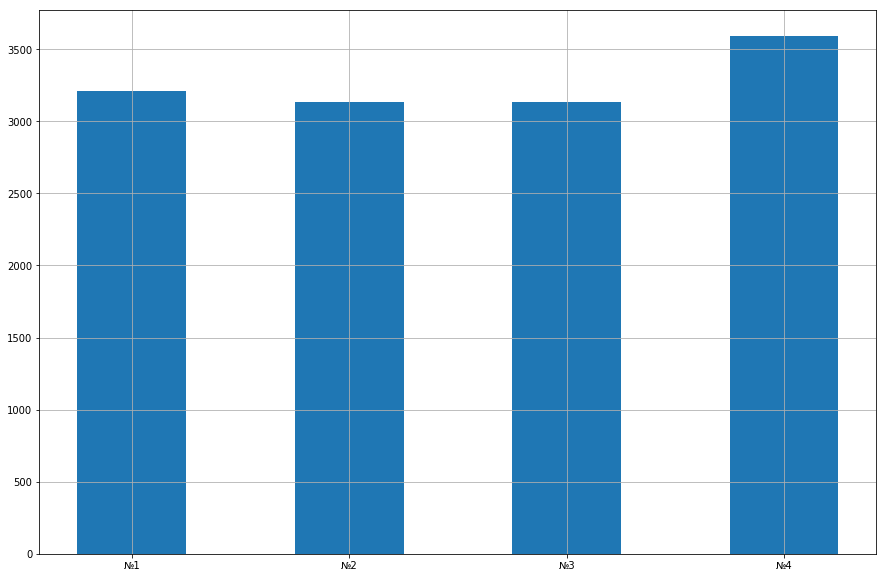

In [212]:
from matplotlib import pyplot as plt
correct = plt.figure(figsize=(15,10))

plt.grid()
plt.hist(all_df['5'].tolist(), bins=np.arange(5)+0.5, rwidth=0.5)
plt.xticks([1,2,3,4], ['№1', '№2', '№3', '№4'])
plt.show()

In [213]:
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('correct_hist.pdf')
pp.savefig(correct)
pp.close()

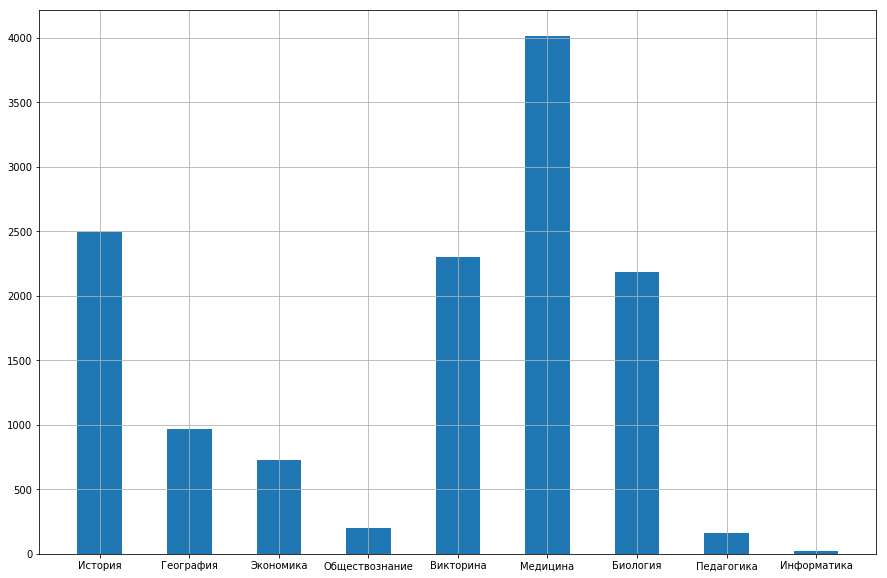

In [214]:
from matplotlib import pyplot as plt
classes = plt.figure(figsize=(15,10))

plt.grid()
plt.hist(all_df['label'].tolist(), bins=np.arange(10)-0.5, rwidth=0.5)
plt.show()

In [215]:
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('data_hist.pdf')
pp.savefig(classes)
pp.close()

In [28]:
all_df['label_num'] = all_df['label'].factorize()[0]

In [29]:
subjects = {'История': [], 'Экономика': [], 'Биология': [], \
            'Медицина': [], 'Информатика': [], 'Педагогика': [], \
            'География': [], 'Обществознание': [], 'Викторина': []}

In [30]:
for i in range(len(all_df)):
    subjects[all_df.iloc[i,6]].append(i)

In [31]:
len(X[:,0][subjects['История']])

2498

In [32]:
import matplotlib
cmap = matplotlib.cm.get_cmap('Paired')

rgba = cmap(2)
rgba

(0.6980392156862745, 0.8745098039215686, 0.5411764705882353, 1.0)

# ELMO

In [133]:
import pickle
with open('/Users/user/Python/Diploma/Embeddings/elmo_embed_big.pickle', 'rb') as f:
    elmo_embs = pickle.load(f)

elmo_embs = np.array(elmo_embs)

In [134]:
import umap
X = umap.UMAP(random_state=4).fit_transform(elmo_embs[:,0,:])
X.shape

(13073, 2)

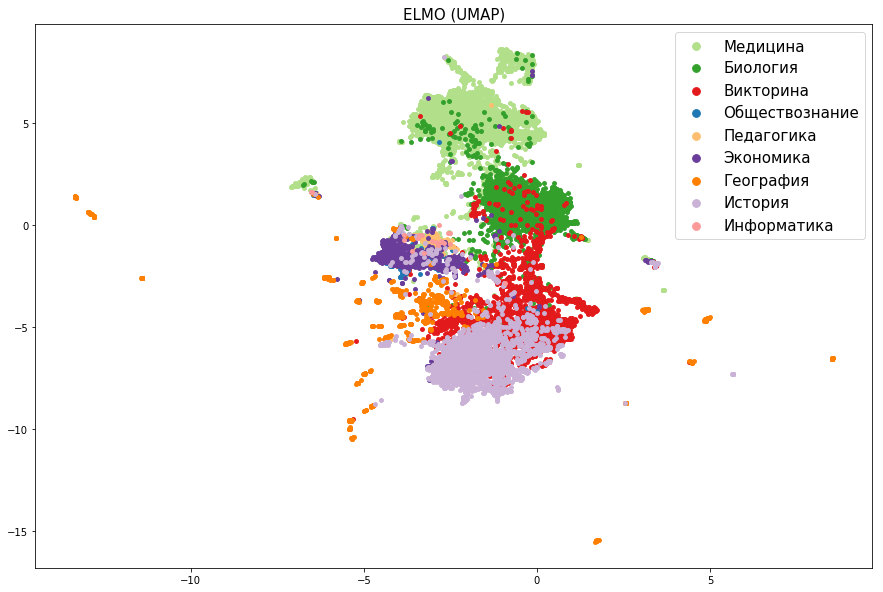

In [135]:
elmo = plt.figure(figsize=(15,10))
plt.scatter(X[:,0][subjects['Медицина']], X[:,1][subjects['Медицина']], label='Медицина', s=15, c=cmap(2)[:3])
plt.scatter(X[:,0][subjects['Биология']], X[:,1][subjects['Биология']], label='Биология', s=15, c=cmap(3)[:3])
plt.scatter(X[:,0][subjects['Викторина']], X[:,1][subjects['Викторина']], label='Викторина', s=15, c=cmap(5)[:3])
plt.scatter(X[:,0][subjects['Обществознание']], X[:,1][subjects['Обществознание']], label='Обществознание', \
            s=15, c=cmap(1)[:3])
plt.scatter(X[:,0][subjects['Педагогика']], X[:,1][subjects['Педагогика']], label='Педагогика', s=15, c=cmap(6)[:3])

plt.scatter(X[:,0][subjects['Экономика']], X[:,1][subjects['Экономика']], label='Экономика', s=15, c=cmap(9)[:3])
plt.scatter(X[:,0][subjects['География']], X[:,1][subjects['География']], label='География', s=15, c=cmap(7)[:3])
plt.scatter(X[:,0][subjects['История']], X[:,1][subjects['История']], label='История', s=15, \
            c=cmap(8)[:3])
plt.scatter(X[:,0][subjects['Информатика']], X[:,1][subjects['Информатика']], label='Информатика', s=15, c=cmap(4)[:3])

plt.title('ELMO (UMAP)', size=15)
plt.legend(fontsize=15, markerscale=2)

In [136]:
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('ELMO_UMAP.pdf')
pp.savefig(elmo)
pp.close()

In [137]:
from MulticoreTSNE import MulticoreTSNE as TSNE

tsne = TSNE(n_jobs=8, random_state=4)
X = tsne.fit_transform(elmo_embs[:,0,:])
X.shape

(13073, 2)

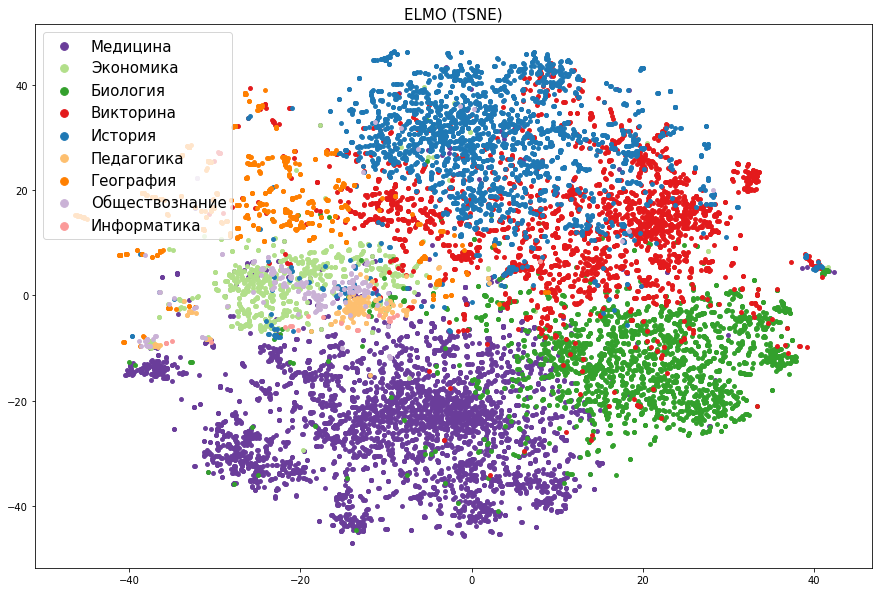

In [138]:
elmo = plt.figure(figsize=(15,10))
plt.scatter(X[:,0][subjects['Медицина']], X[:,1][subjects['Медицина']], label='Медицина', s=15, c=cmap(9)[:3])
plt.scatter(X[:,0][subjects['Экономика']], X[:,1][subjects['Экономика']], label='Экономика', s=15, c=cmap(2)[:3])
plt.scatter(X[:,0][subjects['Биология']], X[:,1][subjects['Биология']], label='Биология', s=15, c=cmap(3)[:3])
plt.scatter(X[:,0][subjects['Викторина']], X[:,1][subjects['Викторина']], label='Викторина', s=15, c=cmap(5)[:3])
plt.scatter(X[:,0][subjects['История']], X[:,1][subjects['История']], label='История',  s=15, c=cmap(1)[:3])
plt.scatter(X[:,0][subjects['Педагогика']], X[:,1][subjects['Педагогика']], label='Педагогика', s=15, c=cmap(6)[:3])
plt.scatter(X[:,0][subjects['География']], X[:,1][subjects['География']], label='География', s=15, c=cmap(7)[:3])
plt.scatter(X[:,0][subjects['Обществознание']], X[:,1][subjects['Обществознание']], label='Обществознание', s=15, \
            c=cmap(8)[:3])
plt.scatter(X[:,0][subjects['Информатика']], X[:,1][subjects['Информатика']], label='Информатика', s=15, c=cmap(4)[:3])

plt.title('ELMO (TSNE)', size=15)
plt.legend(fontsize=15, markerscale=2)

In [139]:
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('ELMO_TSNE.pdf')
pp.savefig(elmo)
pp.close()

# BERT

In [140]:
with open('/Users/user/Python/Diploma/Embeddings/bert_embed_big.pickle', 'rb') as f:
    bert_embs = pickle.load(f)

bert_embs = np.array(bert_embs)

In [141]:
import umap
X = umap.UMAP(random_state=4).fit_transform(bert_embs[:,0,:])
X.shape

(13073, 2)

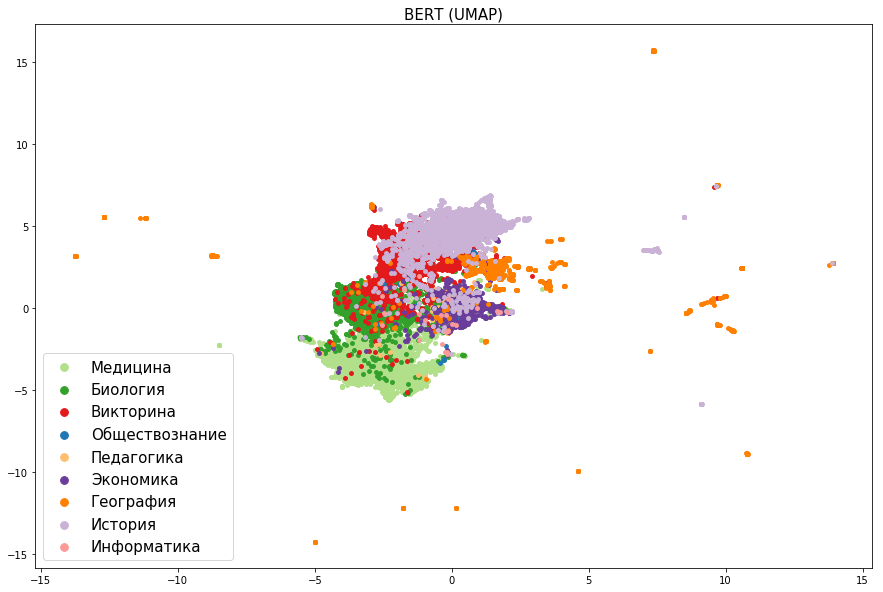

In [142]:
bert = plt.figure(figsize=(15,10))
plt.scatter(X[:,0][subjects['Медицина']], X[:,1][subjects['Медицина']], label='Медицина', s=15, c=cmap(2)[:3])
plt.scatter(X[:,0][subjects['Биология']], X[:,1][subjects['Биология']], label='Биология', s=15, c=cmap(3)[:3])
plt.scatter(X[:,0][subjects['Викторина']], X[:,1][subjects['Викторина']], label='Викторина', s=15, c=cmap(5)[:3])
plt.scatter(X[:,0][subjects['Обществознание']], X[:,1][subjects['Обществознание']], label='Обществознание', \
            s=15, c=cmap(1)[:3])
plt.scatter(X[:,0][subjects['Педагогика']], X[:,1][subjects['Педагогика']], label='Педагогика', s=15, c=cmap(6)[:3])

plt.scatter(X[:,0][subjects['Экономика']], X[:,1][subjects['Экономика']], label='Экономика', s=15, c=cmap(9)[:3])
plt.scatter(X[:,0][subjects['География']], X[:,1][subjects['География']], label='География', s=15, c=cmap(7)[:3])
plt.scatter(X[:,0][subjects['История']], X[:,1][subjects['История']], label='История', s=15, \
            c=cmap(8)[:3])
plt.scatter(X[:,0][subjects['Информатика']], X[:,1][subjects['Информатика']], label='Информатика', s=15, c=cmap(4)[:3])

plt.title('BERT (UMAP)', size=15)
plt.legend(fontsize=15, markerscale=2)

In [143]:
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('BERT_UMAP.pdf')
pp.savefig(bert)
pp.close()

In [144]:
from MulticoreTSNE import MulticoreTSNE as TSNE

tsne = TSNE(n_jobs=8, random_state=4)
X = tsne.fit_transform(bert_embs[:,0,:])
X.shape

(13073, 2)

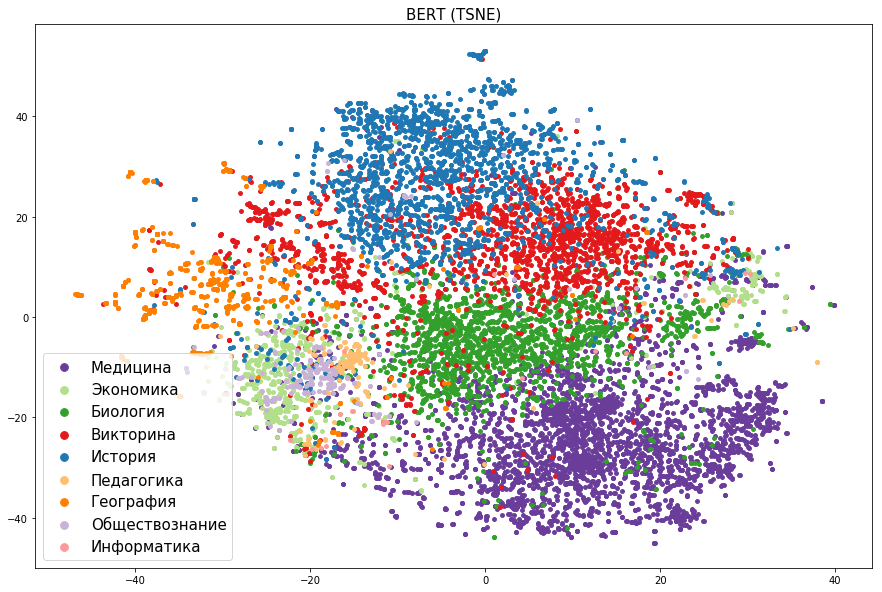

In [145]:
bert = plt.figure(figsize=(15,10))
plt.scatter(X[:,0][subjects['Медицина']], X[:,1][subjects['Медицина']], label='Медицина', s=15, c=cmap(9)[:3])
plt.scatter(X[:,0][subjects['Экономика']], X[:,1][subjects['Экономика']], label='Экономика', s=15, c=cmap(2)[:3])
plt.scatter(X[:,0][subjects['Биология']], X[:,1][subjects['Биология']], label='Биология', s=15, c=cmap(3)[:3])
plt.scatter(X[:,0][subjects['Викторина']], X[:,1][subjects['Викторина']], label='Викторина', s=15, c=cmap(5)[:3])
plt.scatter(X[:,0][subjects['История']], X[:,1][subjects['История']], label='История',  s=15, c=cmap(1)[:3])
plt.scatter(X[:,0][subjects['Педагогика']], X[:,1][subjects['Педагогика']], label='Педагогика', s=15, c=cmap(6)[:3])
plt.scatter(X[:,0][subjects['География']], X[:,1][subjects['География']], label='География', s=15, c=cmap(7)[:3])
plt.scatter(X[:,0][subjects['Обществознание']], X[:,1][subjects['Обществознание']], label='Обществознание', s=15, \
            c=cmap(8)[:3])
plt.scatter(X[:,0][subjects['Информатика']], X[:,1][subjects['Информатика']], label='Информатика', s=15, c=cmap(4)[:3])

plt.title('BERT (TSNE)', size=15)
plt.legend(fontsize=15, markerscale=2)

In [146]:
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('BERT_TSNE.pdf')
pp.savefig(bert)
pp.close()

# FastText

In [177]:
with open('/Users/user/Python/Diploma/Embeddings/fasttext_embed_big.pickle', 'rb') as f:
    fasttext_embs = pickle.load(f)

fasttext_embs = np.array(fasttext_embs)

In [178]:
import umap
X = umap.UMAP(random_state=4).fit_transform(fasttext_embs[:,0,:])
X.shape

/Users/user/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


(13073, 2)

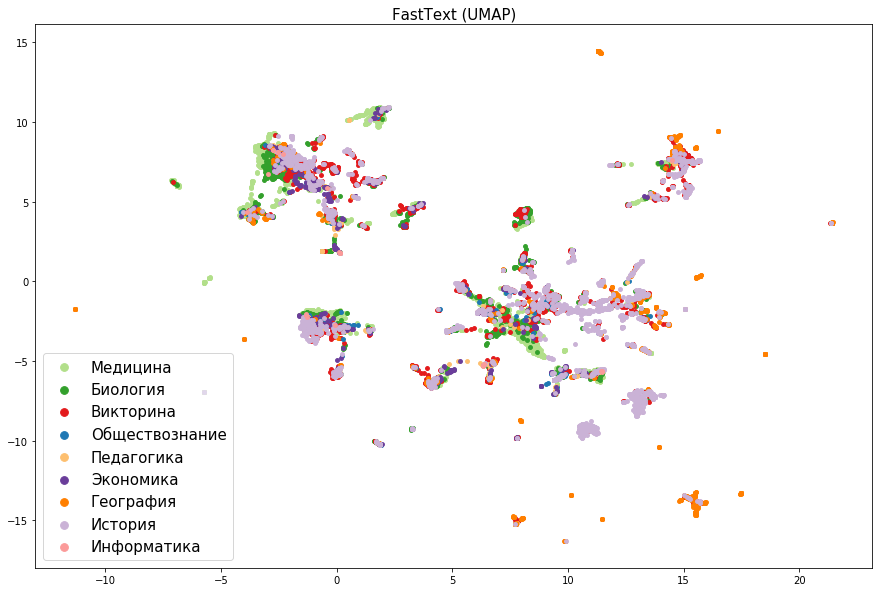

In [179]:
fasttext = plt.figure(figsize=(15,10))
plt.scatter(X[:,0][subjects['Медицина']], X[:,1][subjects['Медицина']], label='Медицина', s=15, c=cmap(2)[:3])
plt.scatter(X[:,0][subjects['Биология']], X[:,1][subjects['Биология']], label='Биология', s=15, c=cmap(3)[:3])
plt.scatter(X[:,0][subjects['Викторина']], X[:,1][subjects['Викторина']], label='Викторина', s=15, c=cmap(5)[:3])
plt.scatter(X[:,0][subjects['Обществознание']], X[:,1][subjects['Обществознание']], label='Обществознание', \
            s=15, c=cmap(1)[:3])
plt.scatter(X[:,0][subjects['Педагогика']], X[:,1][subjects['Педагогика']], label='Педагогика', s=15, c=cmap(6)[:3])

plt.scatter(X[:,0][subjects['Экономика']], X[:,1][subjects['Экономика']], label='Экономика', s=15, c=cmap(9)[:3])
plt.scatter(X[:,0][subjects['География']], X[:,1][subjects['География']], label='География', s=15, c=cmap(7)[:3])
plt.scatter(X[:,0][subjects['История']], X[:,1][subjects['История']], label='История', s=15, \
            c=cmap(8)[:3])
plt.scatter(X[:,0][subjects['Информатика']], X[:,1][subjects['Информатика']], label='Информатика', s=15, c=cmap(4)[:3])

plt.title('FastText (UMAP)', size=15)
plt.legend(fontsize=15, markerscale=2)

In [180]:
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('FastText_UMAP.pdf')
pp.savefig(fasttext)
pp.close()

In [181]:
from MulticoreTSNE import MulticoreTSNE as TSNE

tsne = TSNE(n_jobs=8, random_state=4)
X = tsne.fit_transform(fasttext_embs[:,0,:])
X.shape

(13073, 2)

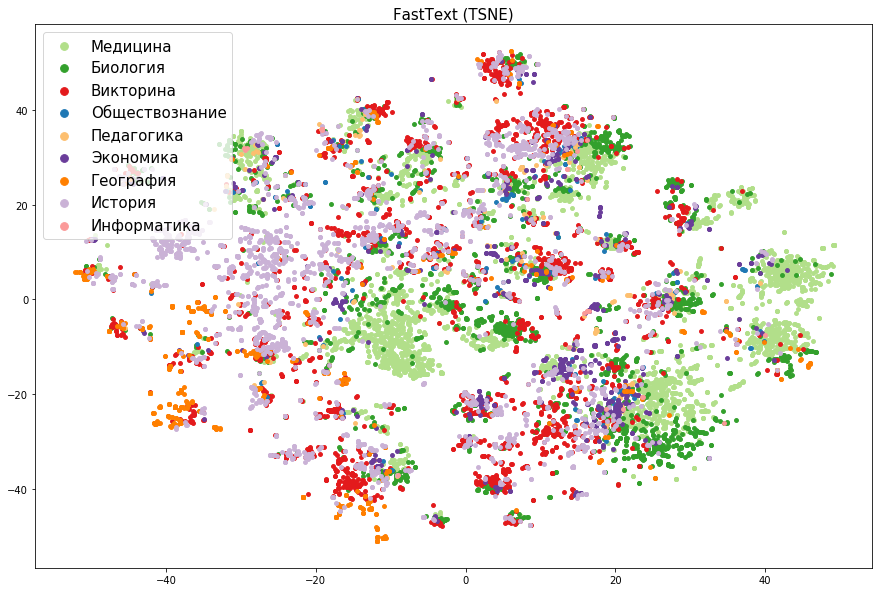

In [182]:
fasttext = plt.figure(figsize=(15,10))
plt.scatter(X[:,0][subjects['Медицина']], X[:,1][subjects['Медицина']], label='Медицина', s=15, c=cmap(2)[:3])
plt.scatter(X[:,0][subjects['Биология']], X[:,1][subjects['Биология']], label='Биология', s=15, c=cmap(3)[:3])
plt.scatter(X[:,0][subjects['Викторина']], X[:,1][subjects['Викторина']], label='Викторина', s=15, c=cmap(5)[:3])
plt.scatter(X[:,0][subjects['Обществознание']], X[:,1][subjects['Обществознание']], label='Обществознание', \
            s=15, c=cmap(1)[:3])
plt.scatter(X[:,0][subjects['Педагогика']], X[:,1][subjects['Педагогика']], label='Педагогика', s=15, c=cmap(6)[:3])

plt.scatter(X[:,0][subjects['Экономика']], X[:,1][subjects['Экономика']], label='Экономика', s=15, c=cmap(9)[:3])
plt.scatter(X[:,0][subjects['География']], X[:,1][subjects['География']], label='География', s=15, c=cmap(7)[:3])
plt.scatter(X[:,0][subjects['История']], X[:,1][subjects['История']], label='История', s=15, \
            c=cmap(8)[:3])
plt.scatter(X[:,0][subjects['Информатика']], X[:,1][subjects['Информатика']], label='Информатика', s=15, c=cmap(4)[:3])

plt.title('FastText (TSNE)', size=15)
plt.legend(fontsize=15, markerscale=2)

In [183]:
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('FastText_TSNE.pdf')
pp.savefig(fasttext)
pp.close()

# RusVectores

In [3]:
import pickle
import numpy as np

with open('/Users/user/Python/Diploma/Embeddings/rusvec_embed_big.pickle', 'rb') as f:
    rusvec_embs = pickle.load(f)

rusvec_embs = np.array(rusvec_embs)

In [185]:
import umap
X = umap.UMAP(random_state=4).fit_transform(rusvec_embs[:,0,:])
X.shape

(13073, 2)

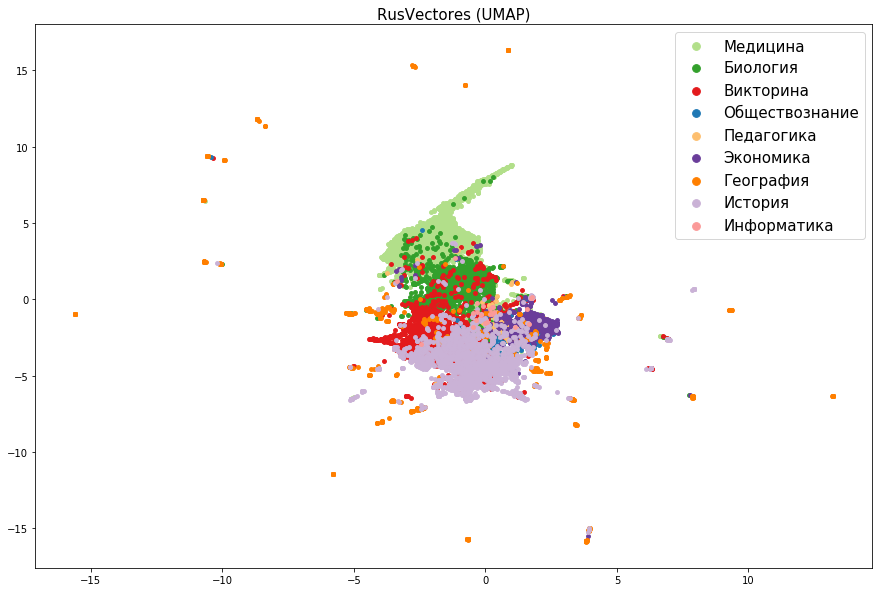

In [186]:
rusvec = plt.figure(figsize=(15,10))
plt.scatter(X[:,0][subjects['Медицина']], X[:,1][subjects['Медицина']], label='Медицина', s=15, c=cmap(2)[:3])
plt.scatter(X[:,0][subjects['Биология']], X[:,1][subjects['Биология']], label='Биология', s=15, c=cmap(3)[:3])
plt.scatter(X[:,0][subjects['Викторина']], X[:,1][subjects['Викторина']], label='Викторина', s=15, c=cmap(5)[:3])
plt.scatter(X[:,0][subjects['Обществознание']], X[:,1][subjects['Обществознание']], label='Обществознание', \
            s=15, c=cmap(1)[:3])
plt.scatter(X[:,0][subjects['Педагогика']], X[:,1][subjects['Педагогика']], label='Педагогика', s=15, c=cmap(6)[:3])

plt.scatter(X[:,0][subjects['Экономика']], X[:,1][subjects['Экономика']], label='Экономика', s=15, c=cmap(9)[:3])
plt.scatter(X[:,0][subjects['География']], X[:,1][subjects['География']], label='География', s=15, c=cmap(7)[:3])
plt.scatter(X[:,0][subjects['История']], X[:,1][subjects['История']], label='История', s=15, \
            c=cmap(8)[:3])
plt.scatter(X[:,0][subjects['Информатика']], X[:,1][subjects['Информатика']], label='Информатика', s=15, c=cmap(4)[:3])

plt.title('RusVectores (UMAP)', size=15)
plt.legend(fontsize=15, markerscale=2)

In [187]:
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('Rusvec_UMAP.pdf')
pp.savefig(rusvec)
pp.close()

In [4]:
from MulticoreTSNE import MulticoreTSNE as TSNE

tsne = TSNE(n_jobs=6, random_state=4)
X = tsne.fit_transform(rusvec_embs[:,0,:])
X.shape

(13073, 2)

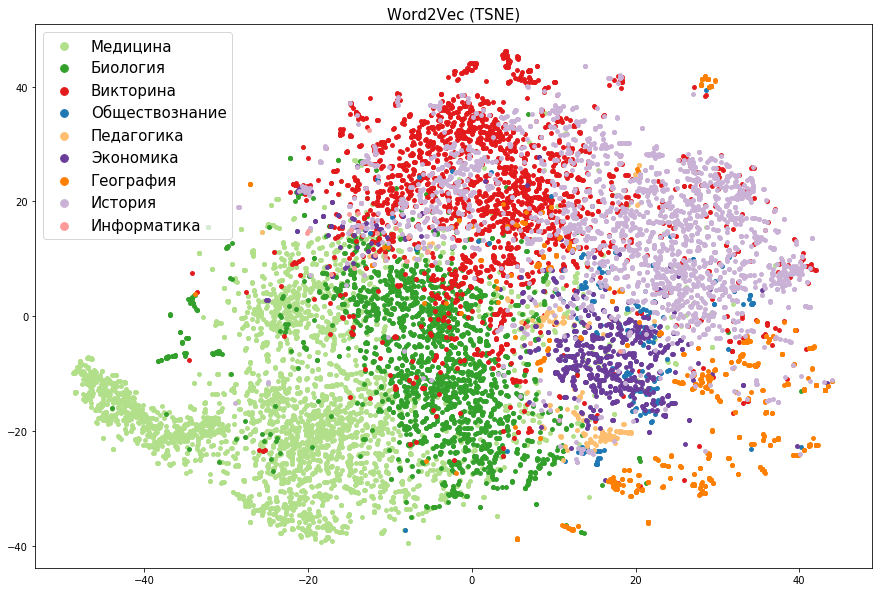

In [33]:
from matplotlib import pyplot as plt
rusvec = plt.figure(figsize=(15,10))
plt.scatter(X[:,0][subjects['Медицина']], X[:,1][subjects['Медицина']], label='Медицина', s=15, c=cmap(2)[:3])
plt.scatter(X[:,0][subjects['Биология']], X[:,1][subjects['Биология']], label='Биология', s=15, c=cmap(3)[:3])
plt.scatter(X[:,0][subjects['Викторина']], X[:,1][subjects['Викторина']], label='Викторина', s=15, c=cmap(5)[:3])
plt.scatter(X[:,0][subjects['Обществознание']], X[:,1][subjects['Обществознание']], label='Обществознание', \
            s=15, c=cmap(1)[:3])
plt.scatter(X[:,0][subjects['Педагогика']], X[:,1][subjects['Педагогика']], label='Педагогика', s=15, c=cmap(6)[:3])

plt.scatter(X[:,0][subjects['Экономика']], X[:,1][subjects['Экономика']], label='Экономика', s=15, c=cmap(9)[:3])
plt.scatter(X[:,0][subjects['География']], X[:,1][subjects['География']], label='География', s=15, c=cmap(7)[:3])
plt.scatter(X[:,0][subjects['История']], X[:,1][subjects['История']], label='История', s=15, \
            c=cmap(8)[:3])
plt.scatter(X[:,0][subjects['Информатика']], X[:,1][subjects['Информатика']], label='Информатика', s=15, c=cmap(4)[:3])

plt.title('Word2Vec (TSNE)', size=15)
plt.legend(fontsize=15, markerscale=2)

In [34]:
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('Rusvec_TSNE.pdf')
pp.savefig(rusvec)
pp.close()